In [7]:
"""
All necessary imports
"""

import math
import csv

import numpy as np
import pandas as pd
import scipy.stats as stats
import scipy.spatial.distance as distance
import scipy

from pandas import read_csv
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from minepy import MINE

import matplotlib.pyplot as plt
import seaborn
from mrmr import mrmr_classif
import pprint
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import r2_score
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import r2_score

from sklearn.feature_selection import SelectFromModel




In [8]:
df = pd.read_csv('magneticmoment_Ef_data.csv', header=0)


In [9]:
tmp = []
for j in range(len(df.columns)):
    if( not (isinstance(df.iloc[0][j], np.float64) or isinstance(df.iloc[0][j], np.int64)) ):
        tmp.append(df.columns[j])

#print(tmp)
df = df.drop(columns=tmp)


In [10]:
#remove what we want to predict
to_predict = ['formation_energy', 'magnetic_moment']
# labels = df[to_predict[0]]


# df = df.drop(columns=to_predict)
X= df.drop(to_predict, axis=1)
y = df[to_predict[1]]

In [11]:
# Using Skicit-learn to split data into training and testing sets

# Split the data into training and testing sets

def make_train_test_split(features, labels):
    return train_test_split(features, labels, test_size = 0.25, random_state = 421)
   


def get_r_sq(predictions, test_labels):
    r_sq = metrics.r2_score(predictions, test_labels)
    return r_sq

# def train_model(X_train, y_train):
#     """Train an Extra Trees Regression model with hyperparameter tuning."""
#     param_grid = {
#         'n_estimators': [50, 100, 200, 300, 500],
#         'max_depth': [None, 5, 10],
#         'min_samples_split': [2, 5, 10]
#     }

#     model = ExtraTreesRegressor(random_state=42)
#     grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
#     grid_search.fit(X_train, y_train)
#     best_model = grid_search.best_estimator_
#     return best_model

# ... (previous code omitted for brevity)

from sklearn.feature_selection import SelectFromModel

def train_model(X_train, y_train):
    """Train an Extra Trees Regression model with hyperparameter tuning."""
    param_grid = {
        'n_estimators': [50, 100, 200, 300, 500],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10]
    }

    model = ExtraTreesRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    return best_model


def evaluate_model(model, X_test, y_test):
    """Evaluate the trained model on the test set using R-squared."""
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    return r2

def plot_predictions(y_test, y_pred, r2):
    """Plot the model's predictions against the true values with R-squared in the legend."""
    plt.scatter(y_test, y_pred, alpha=0.5, label=f'R-squared = {r2:.3f}')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('True vs. Predicted Values')
    plt.legend()
    plt.show()

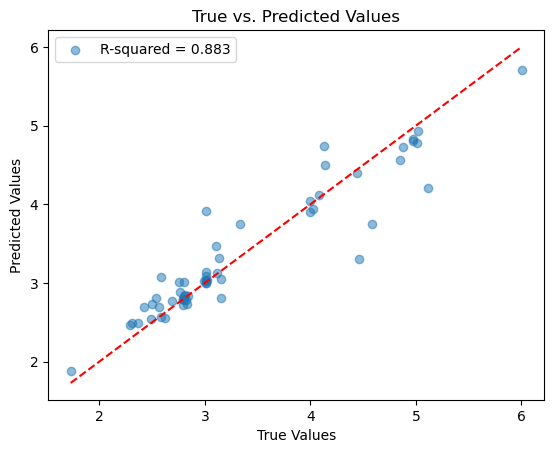

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Train the model with hyperparameter tuning
model = train_model(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
r2 = evaluate_model(model, X_test, y_test)

# Plot the predictions
plot_predictions(y_test, y_pred, r2)